In [40]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm 
import scipy.stats as stats 
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score





# Reading Data

In [4]:
df = pd.read_csv('housing.csv')

# Data Information
## I check the number of columns
## type of each column
## number of null values at each column
## Then clean the data before start the anlaysing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Since total_bedrooms is likely to have a skewed distribution (similar to most real-world numerical data), imputing the missing values with the median is a good choice. This approach avoids the influence of outliers, which can affect the mean.

In [7]:
median_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median_bedrooms, inplace=True)

In [8]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Ensure there are no duplicate rows in the dataset:

In [10]:
df.drop_duplicates(inplace=True)

Detect and remove or cap outliers for numerical features like medianHouseValue if necessary:

In [12]:
df = df[df['longitude'] < df['longitude'].quantile(0.99)]
df = df[df['latitude'] < df['latitude'].quantile(0.99)]
df = df[df['housing_median_age'] < df['housing_median_age'].quantile(0.99)]
df = df[df['total_rooms'] < df['total_rooms'].quantile(0.99)]
df = df[df['total_bedrooms'] < df['total_bedrooms'].quantile(0.99)]
df = df[df['population'] < df['population'].quantile(0.99)]
df = df[df['households'] < df['households'].quantile(0.99)]
df = df[df['median_income'] < df['median_income'].quantile(0.99)]
df = df[df['median_house_value'] < df['median_house_value'].quantile(0.99)]

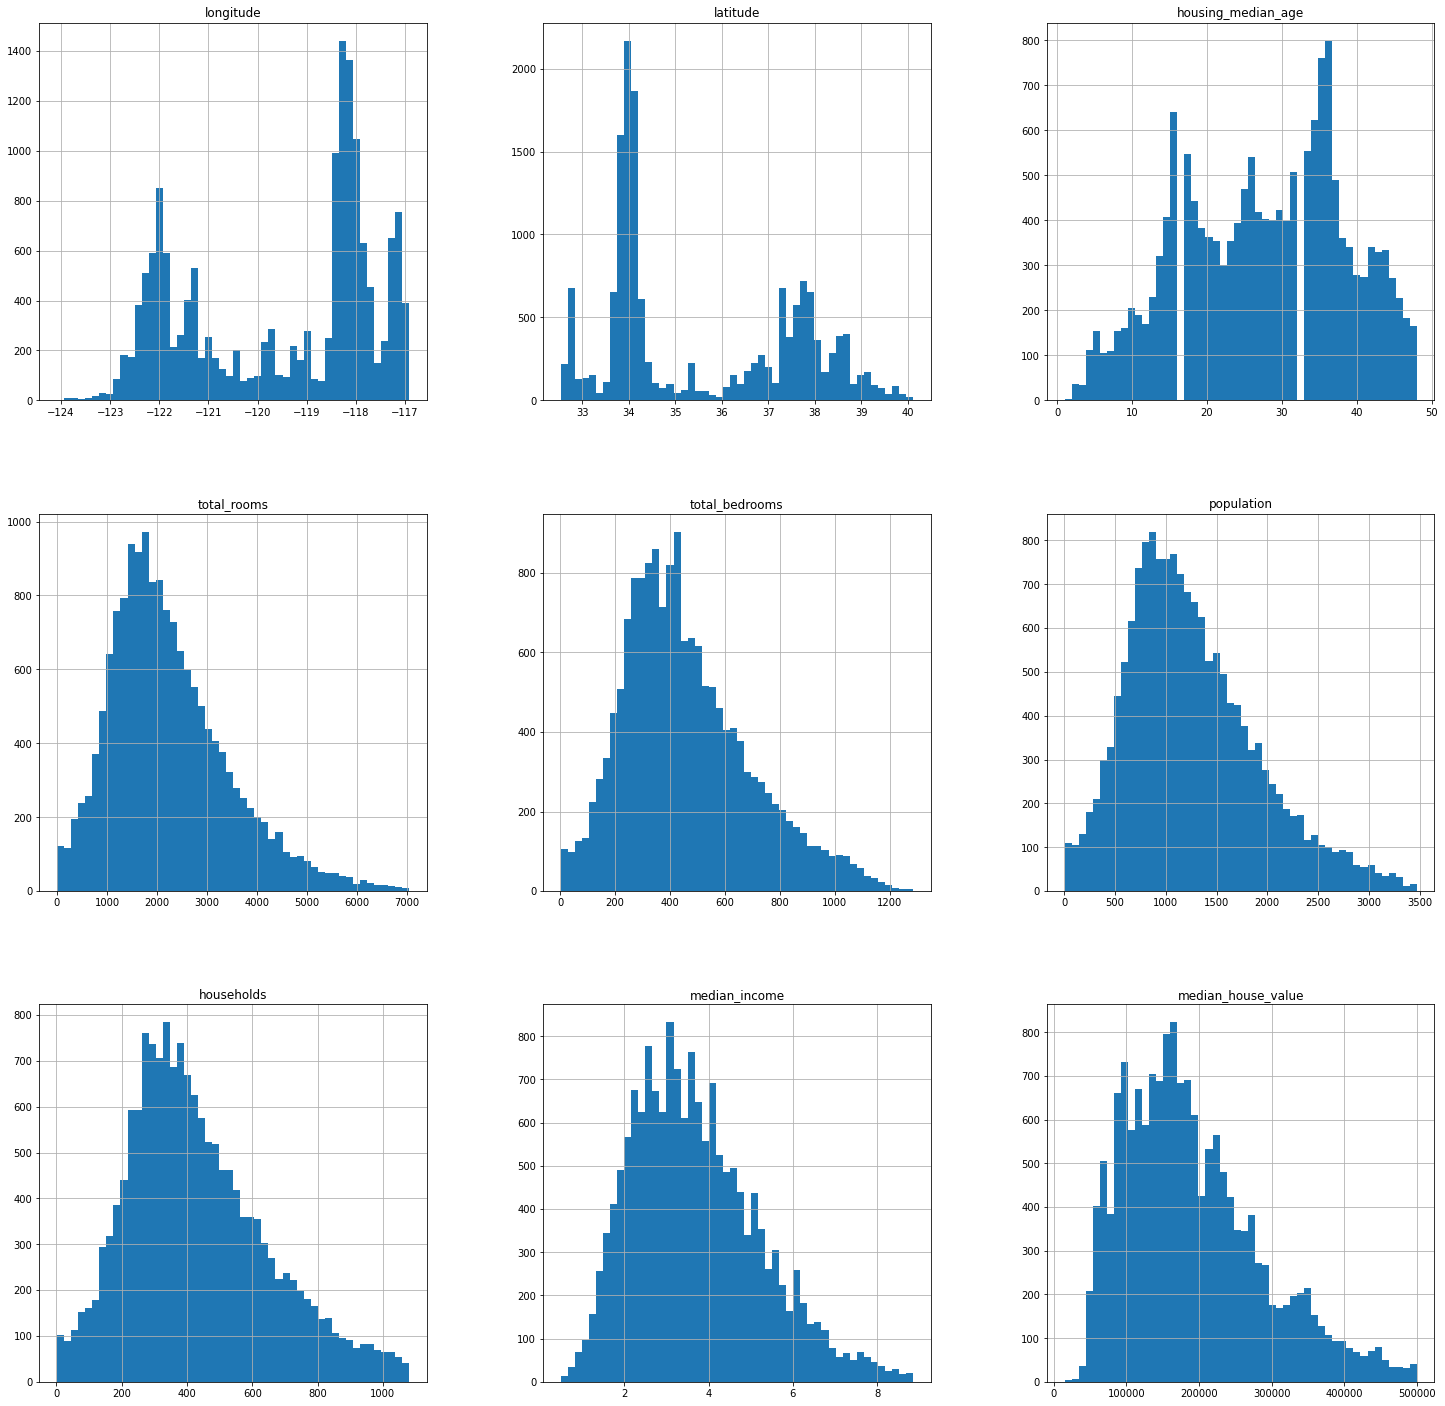

In [13]:
df.hist(figsize=(25,25),bins=50);

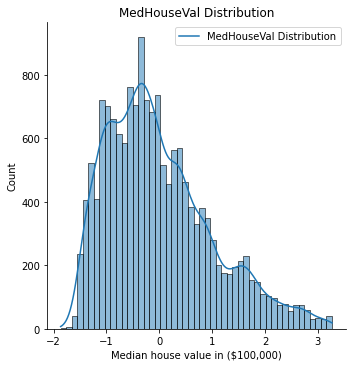

In [25]:
#CREATING A DISTRIBUTION PLOT FOR TARGET FEATURE 
sns.displot(df['median_house_value'], kde = True) 
plt.title('MedHouseVal Distribution') 
plt.xlabel("Median house value in ($100,000)") 
plt.legend(['MedHouseVal Distribution'], loc = 'best') 
plt.show()

In [14]:
hcorr = df.corr()
hcorr.style.background_gradient()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.928186,0.012187,-0.013265,0.036224,0.112783,0.041221,-0.026851,-0.027204
latitude,-0.928186,1.000000,-0.086664,0.010469,-0.050597,-0.138551,-0.074075,-0.055616,-0.154763
housing_median_age,0.012187,-0.086664,1.000000,-0.330789,-0.259990,-0.191202,-0.236816,-0.195291,0.014392
total_rooms,-0.013265,0.010469,-0.330789,1.000000,0.878813,0.771673,0.881369,0.297287,0.206908
total_bedrooms,0.036224,-0.050597,-0.259990,0.878813,1.000000,0.825770,0.969712,-0.022179,0.083682
population,0.112783,-0.138551,-0.191202,0.771673,0.825770,1.000000,0.867041,-0.002257,-0.019281
households,0.041221,-0.074075,-0.236816,0.881369,0.969712,0.867041,1.000000,0.018056,0.106100
median_income,-0.026851,-0.055616,-0.195291,0.297287,-0.022179,-0.002257,0.018056,1.000000,0.654017
median_house_value,-0.027204,-0.154763,0.014392,0.206908,0.083682,-0.019281,0.106100,0.654017,1.000000


Now that we know which feature (MedInc) correlates most with our target variable we can investigate it more in depth.

Text(0, 0.5, 'median_house_value')

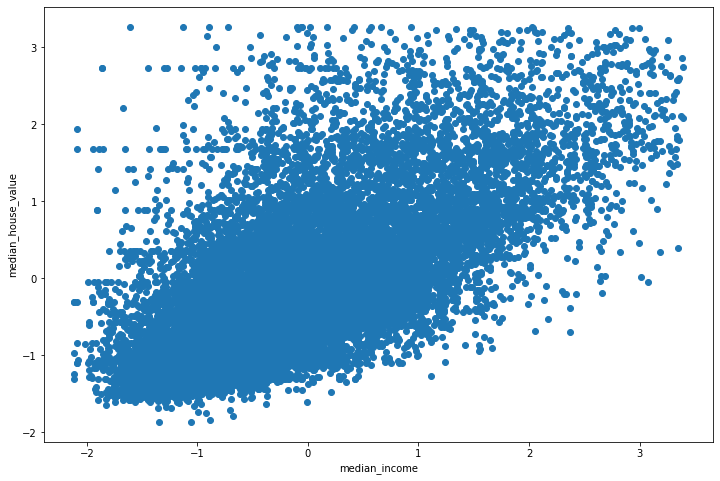

In [26]:
plt.figure(figsize=(12, 8)) 
plt.scatter(data = df, x = "median_income", y = "median_house_value") 
plt.xlabel("median_income") 
plt.ylabel("median_house_value")

There exists a positive correlation — The general pattern that we can see is that as the median income increases the Median Price of house increases.

Now we can also take a look at how Longitude and Lattitude can help us predict the Housing prices.

Text(0.5, 1.0, 'Median house value depending on location')

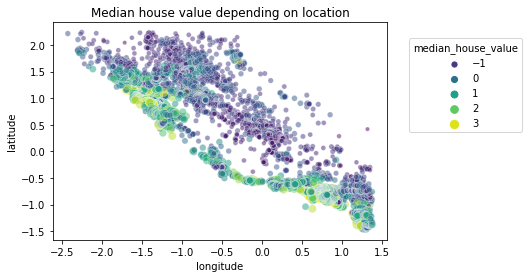

In [28]:
sns.scatterplot(data = df, x = "longitude", y = "latitude", size = "median_house_value", hue = "median_house_value", palette = "viridis", alpha=0.5) 
plt.legend(title = "median_house_value", bbox_to_anchor = (1.05, 0.95), loc = "upper left") 
plt.title("Median house value depending on location")

From the map above, we can see that the location of the House also gives us useful insight as to what could be the Median price of House, Houses of similar price ranges for clusters together on the map and we can use this to get an estimate price based on location.

# DATASET INFORMATION

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Convert categorical feature (ocean_proximity)


In [18]:
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

Scale the numerical features to normalize them, Standardization is a common approach:

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


Create new features that might help improve model performance

In [22]:
df['roomsPerHousehold'] = df['total_rooms'] / df['households']
df['bedroomsPerRoom'] = df['total_bedrooms'] / df['total_rooms']
df['populationPerHousehold'] = df['population'] / df['households']

After creating new features, consider dropping less useful or redundant features:

In [24]:
df.drop(['total_rooms', 'total_bedrooms'], axis=1, inplace=True)

Target feature Normalization

In the EDA Phase, we saw that the distribution of our target variable is not a normal distribution but it is skewed which can affect the performance of many learning algorithms. So let’s try to tranform our target distribution into a normal one. To do this we use a log transformation. We will use qq-plot to see the transformation effect

In [30]:
dfX = df.drop("median_house_value",axis=1)
dfY = df["median_house_value"]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


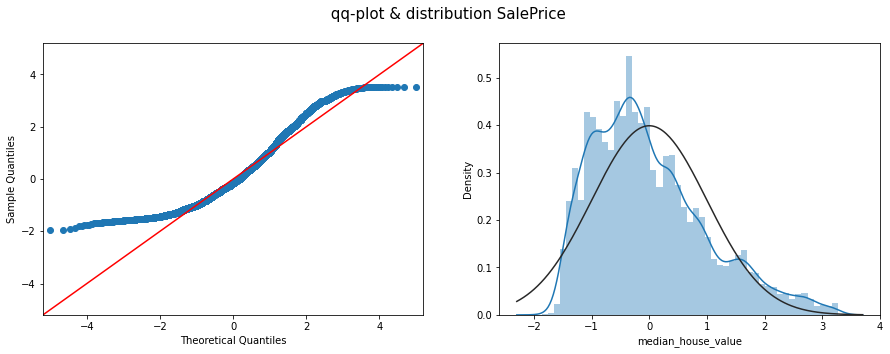

In [31]:
#IMPORTING LIBRARIES TO PERFORM NORMALIZATION 
from scipy.stats import norm 
import scipy.stats as stats 
import statsmodels.api as sm 

# MedHouseVal BEFORE TRANSFORMATION 
fig, ax = plt.subplots(1,2, figsize= (15,5)) 
fig.suptitle(" qq-plot & distribution SalePrice ", fontsize= 15) 
sm.qqplot(dfY, stats.t, distargs=(4,), fit = True, line = "45", ax = ax[0]) 
sns.distplot(dfY, kde = True, hist = True, fit = norm, ax = ax[1]) 
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


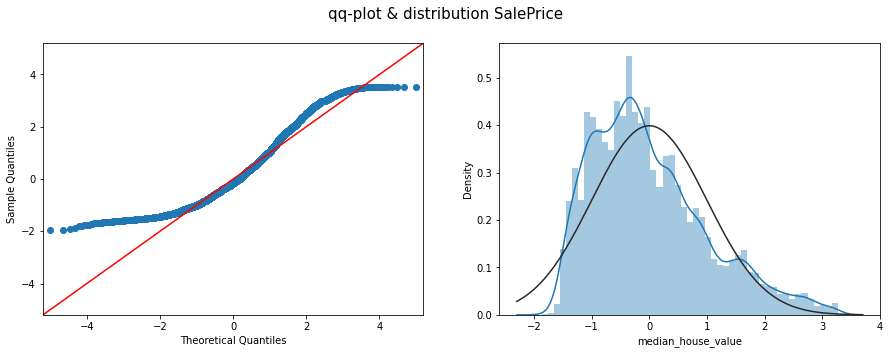

In [33]:
# MedHouseVal after transformation 
y_target_log = np.log1p(dfY) 
fig, ax = plt.subplots(1,2, figsize= (15,5)) 
fig.suptitle("qq-plot & distribution SalePrice ", fontsize= 15) 
sm.qqplot(dfY, stats.t, distargs=(4,), fit = True, line = "45", ax = ax[0]) 
sns.distplot(dfY, kde = True, hist = True, fit = norm, ax = ax[1]) 
plt.show()

The data distribution of our target variable has more normal distribution than before

Split the dataset into training and testing sets to evaluate your model's performance:

In [37]:
# Step5: Split the dataset: Split the data into 
# 80% training dataset and 20% test dataset
from sklearn.model_selection import train_test_split 



X_train,X_test,Y_train,Y_test = train_test_split(dfX,dfY,test_size=0.2,random_state=42)

# Modeling

## Linear Regressor

In [41]:
# Initialize the model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train, Y_train)

# Predict on the test set
Y_pred_lr = linear_reg.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(Y_test, Y_pred_lr)
r2_lr = r2_score(Y_test, Y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr}, R^2: {r2_lr}")


Linear Regression - MSE: 0.38907242589456964, R^2: 0.6184931498880051


## Randon Forest

In [42]:
# Initialize the model
rf_reg = RandomForestRegressor(random_state=42)

# Train the model
rf_reg.fit(X_train, Y_train)

# Predict on the test set
Y_pred_rf = rf_reg.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
r2_rf = r2_score(Y_test, Y_pred_rf)

print(f"Random Forest Regressor - MSE: {mse_rf}, R^2: {r2_rf}")


Random Forest Regressor - MSE: 0.22427831059607564, R^2: 0.7800828171587404


## Gradient Boosting

In [43]:
# Initialize the model
gb_reg = GradientBoostingRegressor(random_state=42)

# Train the model
gb_reg.fit(X_train, Y_train)

# Predict on the test set
Y_pred_gb = gb_reg.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(Y_test, Y_pred_gb)
r2_gb = r2_score(Y_test, Y_pred_gb)

print(f"Gradient Boosting Regressor - MSE: {mse_gb}, R^2: {r2_gb}")


Gradient Boosting Regressor - MSE: 0.2705854761036556, R^2: 0.7346761019185325


from above data we can observe that the Random Forest models are able to provide the best performance.

We will use Random Forest Regressor for making predictions on new data. 

To display the performance of your Random Forest model, I visualize its performance using several metrics and plots

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions on the test set
Y_pred_rf = rf_reg.predict(X_test)

# Mean Squared Error
mse_rf = mean_squared_error(Y_test, Y_pred_rf)

# R² Score
r2_rf = r2_score(Y_test, Y_pred_rf)

print(f"Random Forest Regressor Performance:")
print(f"MSE: {mse_rf}")
print(f"R² Score: {r2_rf}")


Random Forest Regressor Performance:
MSE: 0.22427831059607564
R² Score: 0.7800828171587404


You can visualize how well your model's predictions match the actual values using a scatter plot.

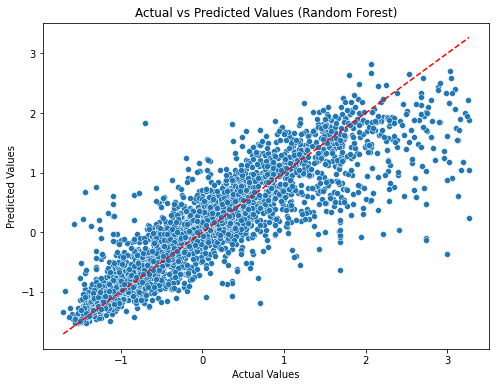

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_test, y=Y_pred_rf)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.show()


A residual plot helps to visualize the errors (residuals) of the model. Ideally, residuals should be randomly scattered around zero, indicating a good fit.

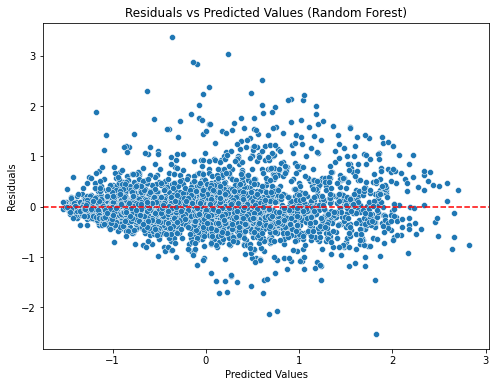

In [47]:
residuals = Y_test - Y_pred_rf

plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_pred_rf, y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Random Forest)')
plt.axhline(0, color='red', linestyle='--')
plt.show()


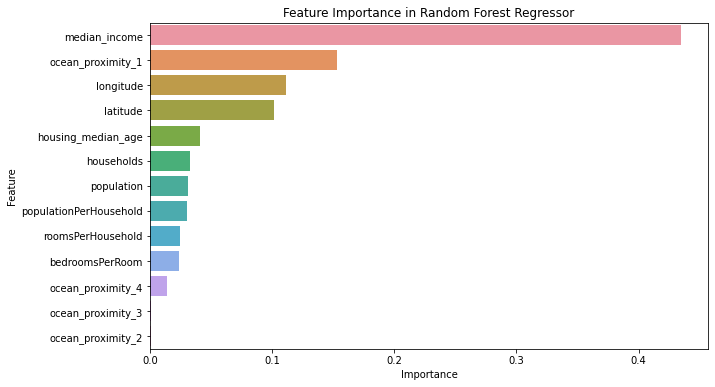

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance
feature_importance = rf_reg.feature_importances_

# Create a DataFrame for better visualization
features = dfX.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Random Forest Regressor')
plt.show()



From above analysis we can conclude that the features ‘MedInc’, ‘Latitude’, ‘Longitude’ and ‘Ocean_proximity_1’ contribute significantly more in producing the final predictions that other features.